## credit card fraud datset blah blah bah

In [91]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import Analysis_repo
from Analysis_repo import sourceCode

# get data from source code
creditcardData = sourceCode.sendCreditCardData()
creditcardData  

# temp chnage

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


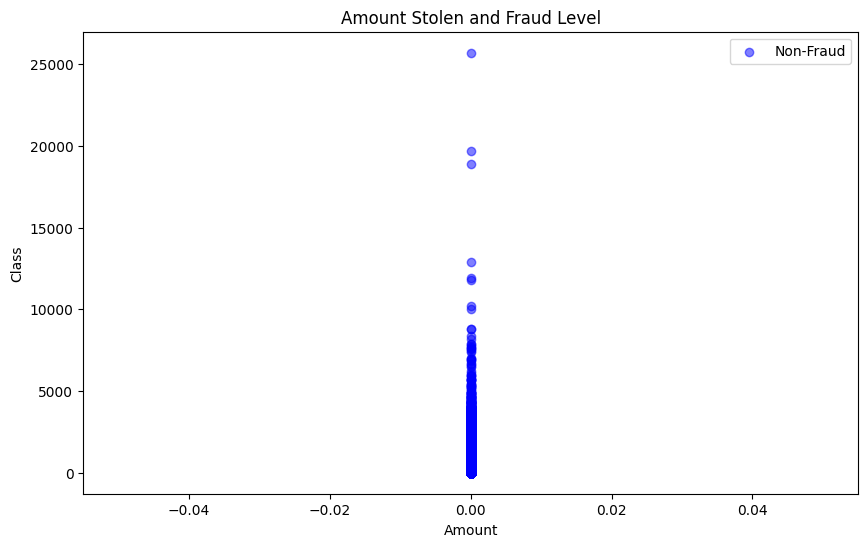

In [93]:
# Create a scatterplot with different colors for each class


# <<<<< Check out a cool plot taht can make this look better than it is



plt.figure(figsize=(10, 6))

fraud = creditcardData[creditcardData['Class'] == 1]
non_fraud = creditcardData[creditcardData['Class'] == 0]

plt.scatter(non_fraud['Class'], non_fraud['Amount'], c='b', label='Non-Fraud', alpha=0.5)
#plt.scatter(fraud['Class'], fraud['Amount'], c='r', label='Fraud', alpha=0.5)

plt.title('Amount Stolen and Fraud Level')
plt.xlabel('Amount')
plt.ylabel('Class')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [94]:
# 

df_agg = creditcardData.loc[:,['Amount', 'Class']].groupby('Class')
vals = [creditcardData['Amount'].values.tolist() for i, df in df_agg]



In [74]:
# Form ML model.

np.random.seed(19184914) # set seed

#independent and dependent variables
Variable_inputs_X = creditcardData.drop("Class", axis=1)
Output_domain_Y = creditcardData['Class']

# set seeds and generte random variables
i = np.random.choice(Output_domain_Y.index, size = len(Output_domain_Y), replace= False)

train_set_size = int(len(creditcardData) * 0.8) #make sure this value is an int for indexiing purposes
#print(train_set_size)

# train test split for the data points:
x_train = Variable_inputs_X.loc[i][:train_set_size]
y_train = Output_domain_Y.loc[i][:train_set_size]
   
x_test = Variable_inputs_X.loc[i][train_set_size:]
y_test = Output_domain_Y.loc[i][train_set_size:]


# Form a linear regression model
from sklearn.linear_model import LinearRegression
full_model = LinearRegression().fit(x_train, y_train) #form regression model.
full_model.coef_, full_model.intercept_

# print basic mode statistics:
print("Model Coefficients: \n", full_model.coef_)
print("\n Model Intercept:",round(full_model.intercept_, 5))


Model Coefficients: 
 [-5.44093554e-09 -1.91403421e-03  2.77274396e-03 -5.05056417e-03
  3.70446688e-03 -2.32159771e-03 -1.62072517e-03 -6.70611659e-03
  7.52760142e-04 -3.54357495e-03 -7.97039538e-03  6.13926552e-03
 -1.05768432e-02 -2.12019060e-04 -1.29436752e-02 -2.45103594e-04
 -9.18229700e-03 -1.57483259e-02 -5.48082384e-03  1.89442989e-03
  3.35386864e-04  2.24447700e-03  1.94723092e-04  7.94950293e-05
 -4.98059832e-04  2.86274314e-04  3.79103208e-04  1.80745853e-03
  1.16113889e-03  6.43553970e-06]

 Model Intercept: 0.00165


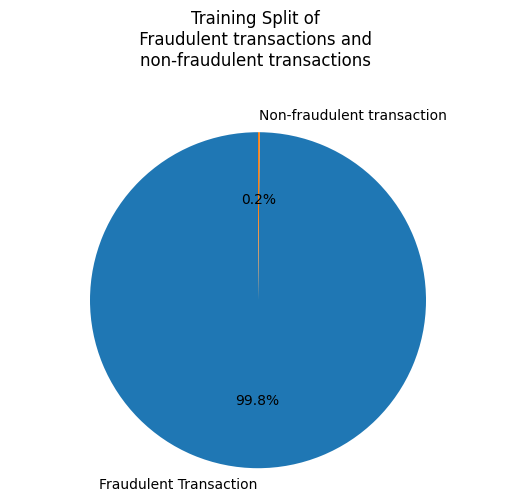

In [79]:
# Pie chart - Comparing the weight of fraud and non fraudulent transactions 
zero_count = (creditcardData['Class'] == 0).sum()
num_count = (creditcardData['Class'] == 1).sum()
fraud_class_labels = ['Fraudulent Transaction', 'Non-fraudulent transaction']
transactions_sizes_weight = [zero_count, num_count]  # Transaction type sizes


# Pie Chart creation
plt.pie(transactions_sizes_weight, labels=fraud_class_labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Training Split of \n Fraudulent transactions and  \nnon-fraudulent transactions \n \n')

# Show the pie chart
plt.show()


In [ ]:
#<<<<<< AAAHHHH plots >>>>>>
# PLot 2



#<<<<<< AAAHHHH plots >>>>>>
#<<<<<< AAAHHHH plots >>>>>>
#<<<<<< AAAHHHH plots >>>>>>
#<<<<<< AAAHHHH plots >>>>>>
#<<<<<< AAAHHHH plots >>>>>>

In [33]:
# Modelling questions 




# add new data from the model


# has the model improved


# Online qA


# Online qB

## Testing the effectiveness of the model

To test the model that has been trained, we compute statistics to help us analyze the effectiveness of teh model that has been created. 

Statistics of interest:
1. $R^2$ value
2. Mean Square Error
3. Mean Absolute Error
4. $R^2$ range of comparison values
5. If $R_0^2 = 0.5$ is used; Comment on the effectiveness if the model.

In [83]:
#section imports
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
y_pred = full_model.predict(x_test)
model_rsquared = r2_score(y_test, y_pred)
print("R-Squared: " , round(model_rsquared, 4), "\n")

print("Explaining model significance:")
percentage = round((model_rsquared * 100),2)
print("Using the model,", percentage,"% of the variance of Credit Card fraud class can be explained by the explanatory variables used in the model.")
print("")


# Get the MSE and R2 and MAE training and testing values
given_rsquared = 0.5
actual_rsquared = model_rsquared

# Compute mean square error value
print("Mean Square Error output:")
print("Train:", round(mean_squared_error(y_train, full_model.predict(x_train)),4), "Test:", round(mean_squared_error(y_test, full_model.predict(x_test)),4))
print("")

# Compute means absolute error output
print("Mean Absolute Error output:")
print("Train", round(mean_absolute_error(y_train, full_model.predict(x_train)),4),"Test:", round(mean_absolute_error(y_test, full_model.predict(x_test)),4))
print("")

# Compute mean square error value range
print("R^2 value output:")
print("Train", round(r2_score(y_train, full_model.predict(x_train)),4),"Test", round(r2_score(y_test, full_model.predict(x_test)),4))
print("")


##### if the model is greater than 0.5 thenn we consider is useable
# How effective is the model?
# Explaining  the key figures of the model and their meaning:

R-Squared:  0.4938 

Explaining model significane:
Using the model, 49.38 % of the variance of Credit Card fraud class can be explained by the explanatory variables used in the model.

Mean Square Error output:
Train: 0.0008 Test: 0.0009

Mean Absolute Error output:
Train 0.0033 Test: 0.0034

R^2 value output:
Train 0.5282 Test 0.4938



### Add new data to the ...

In [110]:
#independent and dependent variables
Variable_inputs_X = creditcardData.drop("Class", axis=1)
Output_domain_Y = creditcardData['Class']

# add new data to the model

# set seeds and generte random variables
i = np.random.choice(Output_domain_Y.index, size = len(Output_domain_Y), replace= False)
boosted_x_train = Variable_inputs_X.loc[i][train_set_size + 10000:train_set_size + 20000]
#print(boosted_x_train)
boosted_y_train = Output_domain_Y.loc[i][train_set_size + 10000:train_set_size + 20000]
#print(type(boosted_y_train))

# Set column names
boosted_y_train.name = 'Class'
#print(boosted_y_train)

booter_gold_y = pd.DataFrame(boosted_y_train)

booter_gold_y.rename(columns={'0': 'Class'}, inplace=True)
print(boosted_x_train)

new_creditCardData_input = pd.concat([boosted_x_train, booter_gold_y], axis=0)


# create dataset
#boosted_creditCardData = pd.DataFrame([new_creditCardData_input])
#boosted_creditCardData

# create new dictionary of the response variables
#additonal_credit_card_data = 

# >>>>>>>> form the model
#pred = full_model.predict(boosted_creditCardData) # REEVALUATE#print(pred)
#pred.summary()





            Time        V1        V2        V3        V4        V5        V6  \
207151  136540.0 -1.023595 -1.080880  1.287906 -1.561447  1.073483 -0.956386   
93852    64614.0 -0.303542  0.271755  1.232545 -0.646060 -0.118334 -0.284672   
99350    67078.0  1.140170  0.329140  0.204221  1.126954  0.010023 -0.371180   
34930    37884.0 -2.800006 -0.661829 -0.466494 -1.134389  0.121426 -0.594370   
208626  137201.0  2.074194 -0.076268 -1.132609  0.384436 -0.102061 -1.138117   
...          ...       ...       ...       ...       ...       ...       ...   
122377   76536.0  1.172374 -0.080376  0.702829  0.830867 -0.742663 -0.417102   
150855   94067.0  2.069402  0.420586 -2.085185  1.319563  1.032809 -1.093897   
39170    39722.0  0.345561 -1.141811 -0.207233  1.239098 -0.344604  0.412154   
208005  136934.0 -5.742088 -7.662230  0.294666  1.102484  1.773072 -2.249752   
78794    57708.0  1.053380 -1.016574  0.245089 -0.695416 -0.973962 -0.232759   

              V7        V8        V9  .

In [32]:
'''''''''''
Before implementing the regression model, indicate the explanatory variable having the least linear relationships with MedHouseVa
	
Explanatory variables in a regression model are also called
	
Which explanatory variable does have the highest linear relationships with MedHouseVal?
	
.What is the MSE of the model evaluated based on the train data set?

What is the approximated value of Durbin-Watson statistic and its interpretation?
'''''''''''''''

"''\nBefore implementing the regression model, indicate the explanatory variable having the least linear relationships with MedHouseVa\n\t\nExplanatory variables in a regression model are also called\n\t\nWhich explanatory variable does have the highest linear relationships with MedHouseVal?\n\t\n.What is the MSE of the model evaluated based on the train data set?\n\nWhat is the approximated value of Durbin-Watson statistic and its interpretation?\n"

## Decision Tree Modelling

In [ ]:
# librarey and short summary of section>>>>

'''''''''''"

- Why i am using decision tree model?
- The benefits of using the model?
- 

''''''''''''

In [4]:
# start decision tree
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


# make prictions on teh data
y_pred = clf.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')



Accuracy: 0.9991397773954567
Confusion Matrix:
[[56841    25]
 [   24    72]]


In [7]:
# plot the decision tree model <Chnage  athe plot to a nice looking plot>

from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(Variable_inputs_X.columns))
print(tree_rules)


|--- V17 <= -2.76
|   |--- V12 <= -2.18
|   |   |--- V14 <= -3.43
|   |   |   |--- V27 <= 1.69
|   |   |   |   |--- V15 <= 0.99
|   |   |   |   |   |--- V4 <= -0.30
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- V4 >  -0.30
|   |   |   |   |   |   |--- V3 <= -31.51
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- V3 >  -31.51
|   |   |   |   |   |   |   |--- V4 <= 1.72
|   |   |   |   |   |   |   |   |--- V27 <= 0.52
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- V27 >  0.52
|   |   |   |   |   |   |   |   |   |--- V11 <= 3.09
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- V11 >  3.09
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- V4 >  1.72
|   |   |   |   |   |   |   |   |--- V8 <= 17.31
|   |   |   |   |   |   |   |   |   |--- V28 <= 0.83
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   

## Neural networks 

In [25]:
#pip install tensorflow

In [27]:
import tensorflow as tf

# Load or generate your training data


# get size of the datset
train_set_size = int(len(creditcardData) * 0.8) #make sure this value is an int for indexiing purposes
print(train_set_size)


# For this example, let's assume you have features (X_train) and labels (y_train).

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train_set_size,)),  # Define the input shape
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit (for binary classification) and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on a test dataset
# X_test and y_test are your test data and labels
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


227845
Epoch 1/10


ValueError: in user code:

    File "c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\stanf\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 227845), found shape=(None, 30)
